<a href="https://colab.research.google.com/github/Hazim-HF/Project2DataScience/blob/main/P152419_Project2_STQD6014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
    <h3>
        Project 2 <br>
        Hazim Fitri Bin Ahmad Faudzi (P152419) <br>
        Data Science (STQD6014) <br>
        Dr Bernard Lee Kok Bang
    </h3>
</div>


# 1. Introduction
Nowadays, understanding of socio-economic factors that influence the income level has become more important for policymakers and business.
This project aims to derive insights from Adult dataset which is from the UCI Machine Learning Repository.This project will visualize important aspect that will give deeper insight to stakeholder to make sure they can make data-driven decision making.

# 2. Dataset Background
Adult dataset also known as census income dataset is data extracted by Barry Becker from the 1994 Census.This data is available in the UCI Machine Learning Repository. This data has various feature of adult such as age, education, marital status, and so on. The main is famous for machine learning and data mining as it can be used for task such as classification and regression. This data often used to develop predictive modelling to predict whether an individual earns more than $50,000 or not. The data contains 48,842 line of data and have 14 attributes in the dataset. Link to the data [Census Income](https://archive.ics.uci.edu/dataset/20/census+income). A short overview of the data is as below:

- **Age**: Continuous.
- **Workclass**: Categorical (e.g., Private, Self-emp-not-inc, etc.).
- **Education**: Categorical (e.g., Bachelors, Some-college, etc.).
- **Education-num**: Continuous (Number of years of education).
- **Marital-status**: Categorical (e.g., Married-civ-spouse, Divorced, etc.).
- **Occupation**: Categorical (e.g., Tech-support, Craft-repair, etc.).
- **Relationship**: Categorical (e.g., Wife, Own-child, etc.).
- **Race**: Categorical (e.g., White, Black, etc.).
- **Sex**: Categorical (Male or Female).
- **Capital-gain**: Continuous.
- **Capital-loss**: Continuous.
- **Hours-per-week**: Continuous.
- **Native-country**: Categorical (e.g., United States, Mexico, etc.).

# 3. Data Collection and Data Wrangling

In [128]:
# Install uciml repo to import data from UCI Machine Learning Repository
!pip install ucimlrepo

Import necessary library

In [129]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [130]:
# fetch dataset from uci machine learning respository
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets
df = pd.concat([X, y], axis=1)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [131]:
# View data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

the dataset contains **48,842 entries** and **15 columns**, with a mix of numerical (int64) and categorical (object) data types. The numerical columns include age, fnlwgt, education-num, capital-gain, capital-loss, and hours-per-week, which can be directly used in statistical analysis and machine learning models (Pandas Documentation, 2023). Meanwhile, categorical columns such as workclass, education, and income require encoding techniques like one-hot encoding or label encoding to be utilized in machine learning tasks (Geron, 2019).

Additionally, the info() output highlights missing values in the dataset. For instance, workclass has **47879 non-null values**, meaning there are **963 missing values**. Similarly, occupation and native-country have missing values, which may impact analysis and model performance if not handled properly. Common approaches for handling missing data include imputation with the mode or median, or dropping rows with missing values depending on the proportion of missingness (Little & Rubin, 2019). This analysis suggests that preprocessing steps, such as handling missing values and converting categorical variables, will be essential before performing any advanced analytics or machine learning tasks.

**References:**

*   Geron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media.
*   Little, R. J., & Rubin, D. B. (2019). Statistical Analysis with Missing Data. John Wiley & Sons.
* Pandas Documentation. (2023). pandas.DataFrame.info. Retrieved from https://pandas.pydata.org






In [132]:
# View the statistical summary of the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

The age variable has a mean of 38.6 years with a standard deviation of 13.7 years, indicating that most individuals are in their prime working years. The minimum age is 17, while the maximum is 90, covering a wide range. The interquartile range (IQR) of 28 to 48 suggests that the majority of people fall within this working-age bracket, with a median age of 37.

The fnlwgt (Final Weight) represents population weights assigned by the Census Bureau, with a mean of 189,664 and a standard deviation of 105,604, showing high variability. The values range from 12,285 to 1,490,400, meaning that different individuals represent vastly different segments of the population. This variability indicates the importance of using weighted analyses when drawing conclusions from this dataset.

The education-num variable, which quantifies education level, has a mean of 10.1, aligning with "Some College" education. The range is from 1 (Preschool) to 16 (Doctorate), with a median of 10, meaning that most individuals have completed high school or some college. The IQR (9-12) suggests that a large proportion of individuals have education levels between high school and an associate degree.

The capital-gain and capital-loss variables are highly skewed. The mean capital gain is 1,079, but the 75th percentile is still 0, indicating that the majority of individuals report no capital gains. However, the maximum value is 99,999, suggesting that a small subset of high-income individuals receive significant investment returns. Similarly, capital-loss has a mean of 87.5, but since the median and 75th percentile are 0, it is clear that most people do not report losses, while a few individuals face significant financial losses (up to 4,356).

The hours-per-week variable shows that the average workweek is 40.4 hours, close to a standard full-time job. The IQR (40-45) indicates that most people work standard full-time hours. However, the minimum is just 1 hour, while the maximum is 99 hours, suggesting that some individuals either work part-time or have extreme work schedules.

## 3.1 Data Cleaning


### 3.1.1 Check for missing values

In [133]:
# View the total number of missing values in the whole dataset
print(f"Total missing values in the dataset: {df.isnull().sum().sum()}")

# View the total number of missing values in each columns
print(f"Total missing values in each column: {df.isnull().sum()}")

Total missing values in the dataset: 2203
Total missing values in each column: age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

We can see that there are several feature with missing values. When imputing missing values, the most basic approach is to impute the missing values using central tendencies. For categorical variable, we can use mode and for numerical variable, we can use mean or median depending on the variables.

In [134]:
# View all the unique values in the 'workclass' column
print(df['workclass'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

We can see that there are missing data which is denoted by '?' instead of null value. Thus, we will clean the data by replacing with all the '?' with the mode of the data.

In [135]:
# Replace the '?' with the mode of the workclass column
df['workclass'] = df['workclass'].str.replace('?', df['workclass'].mode()[0], regex=False)

<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

Now, we need to make sure that the data does not have any human error'?'

In [136]:
# View the new unique value of the workclass column
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked', nan],
      dtype=object)

<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

Below is the method used for the data imputation.

In [137]:
# Fill missing 'workclass' with mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

# Fill missing 'occupation' with mode
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Fill missing 'native-country' with mode
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

<ipython-input-137-8ec1036477e8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
<ipython-input-137-8ec1036477e8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

Now, we need to double check that we've impute all the missing values in the dataset.

In [138]:
# Count the missing values for each column
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

Next, we double check will other catogorical variable

In [139]:
# Print unique values in education column
print(df['education'].unique())

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [140]:
# Print unique values in marital status column
print(df['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


<font color='red'>**Comment:**

<font color='red'>**- Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

### 3.1.2 Remove duplicate

In [141]:
# Calculate the number of duplicated rows in the data
df.duplicated().sum()

29

In [142]:
# Remove duplicated rows
df = df.drop_duplicates(subset=None, keep='first')

# Calculate the number of duplicated rows to make sure duplicates rows has been removed
df.duplicated().sum()

0

### 3.1.3. Detect outliers

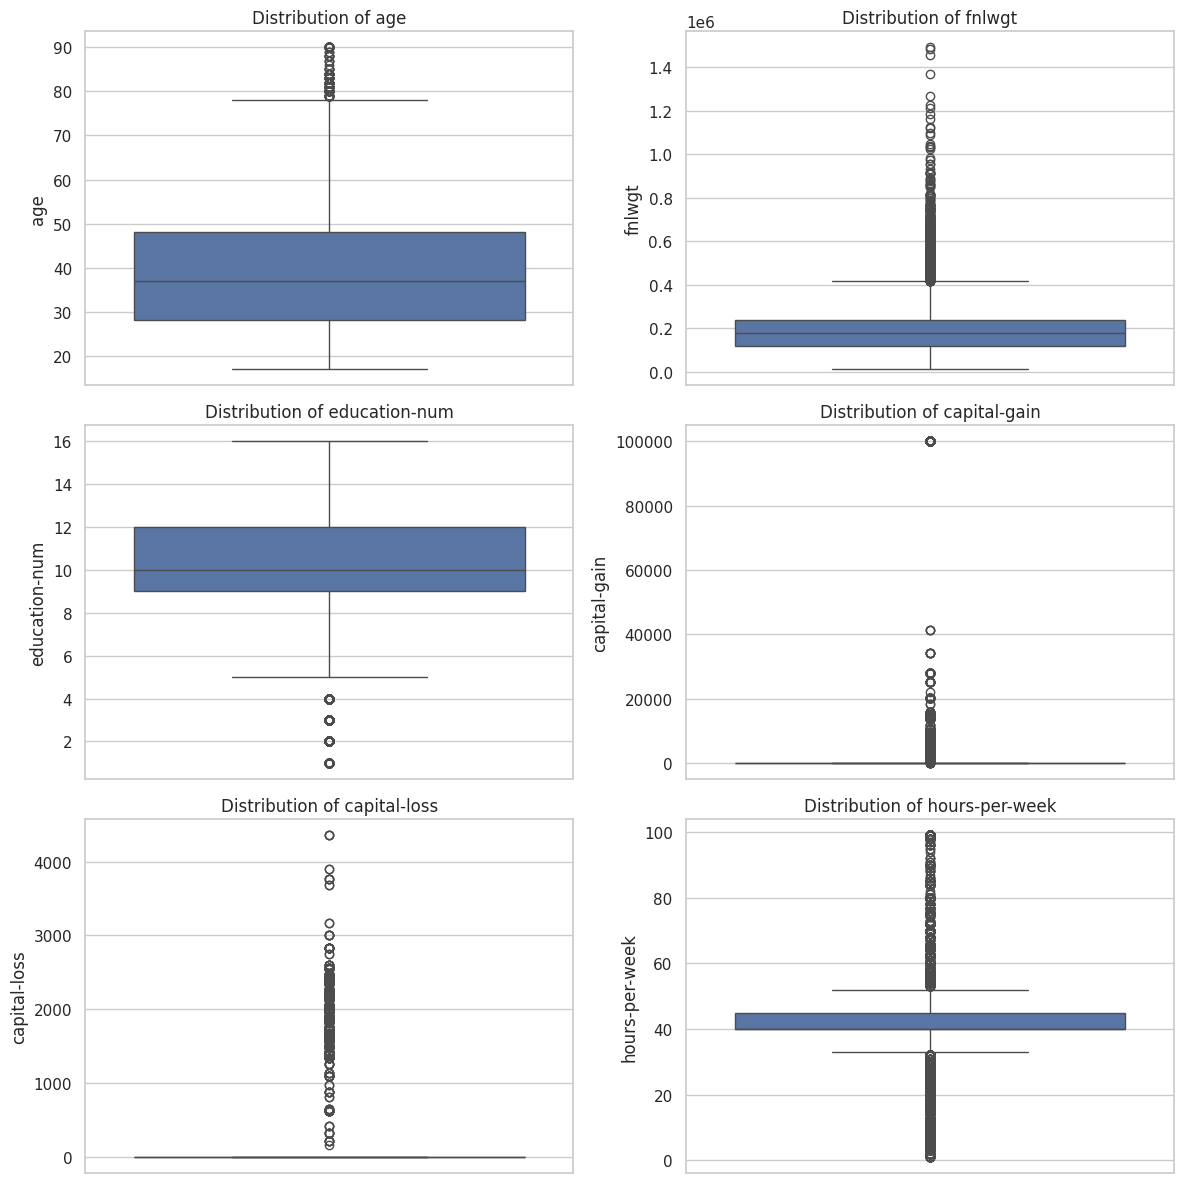

In [143]:
# Plot a boxplot for each numerical column
# Define all numerical columns
cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

fig, axes = plt.subplots(3, 2, figsize=(12,12)) # Create a 3x2 grid of subplots
axes = axes.flatten()

for i, col in enumerate(cols): # Iterate through the list of columns
    sns.boxplot(y=df[col], ax=axes[i]) # Create boxplot of each column
    axes[i].set_title(f'Distribution of {col}') # Set title of each subplot

plt.tight_layout()
plt.show() # display plot

The boxplots provide insights into the distribution of numerical features in the Census Income dataset, highlighting outliers in several variables. Outliers are data points that fall significantly outside the typical range, often beyond 1.5 times the interquartile range (IQR).

In the age distribution, a few outliers appear beyond 70 years, indicating a small proportion of older individuals in the dataset. While most ages fall within 28 to 48 years, those aged above 70 are rare but still part of the working population.

The fnlwgt (final weight) variable has a large number of extreme outliers. The dataset assigns population weights, and while most values are concentrated below 400,000, a few exceed 1.2 million, suggesting certain individuals represent significantly larger portions of the population. These high-weight values should be carefully considered in weighted analyses.

For education-num, outliers appear at the lower end, particularly for individuals with very little formal education (values below 4). This suggests that while most individuals have at least some schooling, a small group lacks significant education, which could impact their earning potential.

The capital-gain and capital-loss distributions show extreme outliers. Most individuals report zero capital gains or losses, but a few report capital gains up to 99,999 and capital losses exceeding 4,000. These outliers likely represent high-income investors or individuals with substantial asset fluctuations.

The hours-per-week variable shows outliers at both extremes. While most people work around 40 hours per week, a few report working above 80 hours or as low as 1 hour. The upper-end outliers might indicate individuals with multiple jobs or self-employed workaholics, while the lower-end values could represent part-time workers or data entry anomalies.

Overall, these outliers provide valuable insights into income distribution, work patterns, and socioeconomic disparities. While some may be genuine, others could be errors or anomalies requiring further investigation before building predictive models.

<font color='red'>**Comments**

<font color='red'>**- What is your justification for removing the outliers?**

<font color='red'>**- How can you be sure that the outliers are not valid data points?**

<font color='red'>**Comments:**

<font color='red'>**- After removing the outliers, does the result align with your expectations?**

<font color='red'>**- Please provide some explanation so that readers can follow your thought process.**

### 3.1.4 Handling variable

In [144]:
# Print all unique values from the workclass column
print(df['workclass'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [145]:
# Print all unique values from the income column
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [146]:
# Standardize unique values from income column by removing '.'
df['income'] = df['income'].str.replace('.', '', regex=False)

# Print unique values from income column to make sure '.' has been removed
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

# 4. Data Visualization and Analysis

## 4.1 What is income bracket distribution across different demographic like age, gender, education level, and occupation?

### 4.1.1 Break down of respondents by income bracket

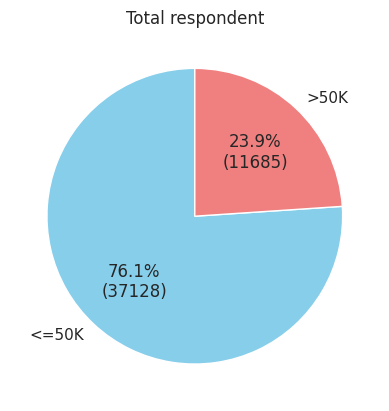

In [147]:
income = df['income'].value_counts() # count income values

# plotting the pie chart1
plt.pie(
    income,
    labels=income.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * income.sum() / 100)})',  # Show percentage and count
    startangle=90,
    colors=['skyblue', 'lightcoral']
)

plt.title('Total respondent') # set appropriate title
plt.ylabel('') # remove y label
plt.show() # show pie chart


The pie chart represents the distribution of total respondents based on their income levels, specifically whether they earn more than 50K (>50K) or 50K or less (<=50K). The majority of respondents, 76.1% (37,128 individuals), fall into the lower income category (≤50K), while only 23.9% (11,685 individuals) earn more than $50K. This indicates a clear imbalance, where a significantly larger proportion of people belong to the lower-income group.

This distribution suggests that high-income individuals (>50K) are a minority, which could reflect broader economic disparities in the population. It highlights potential challenges in income mobility and the concentration of wealth among a smaller subset of individuals. The skewed nature of income distribution is a common trend in real-world datasets, where a larger segment of the workforce earns below a certain threshold, while high earners make up a smaller portion.

From a data science perspective, this class imbalance is important when building predictive models, such as income classification models. The dominance of the ≤50K group might lead to biased model performance if not handled properly. Techniques like resampling, cost-sensitive learning, or adjusting decision thresholds may be needed to ensure that models generalize well for both income groups. Additionally, understanding the factors that contribute to higher earnings—such as education, occupation, or work hours—could provide valuable insights for economic policy and workforce development.

### 4.1.3 Distribution by age

<Figure size 1200x600 with 0 Axes>

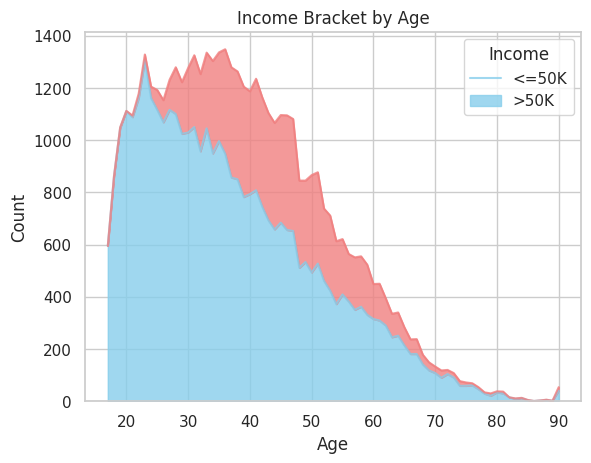

In [168]:
# Ensure correct column names
df.columns = df.columns.str.strip()

# Group data by age and income category
age_income_counts = df.groupby(["age", "income"]).size().unstack()

# Plot
plt.figure(figsize=(12, 6))
age_income_counts.plot(kind="area", stacked=True, alpha=0.8, color = ['skyblue', 'lightcoral'])
plt.title("Income Bracket by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Income", labels=["<=50K", ">50K"])
plt.show()


### 4.1.2 Distribution by sex

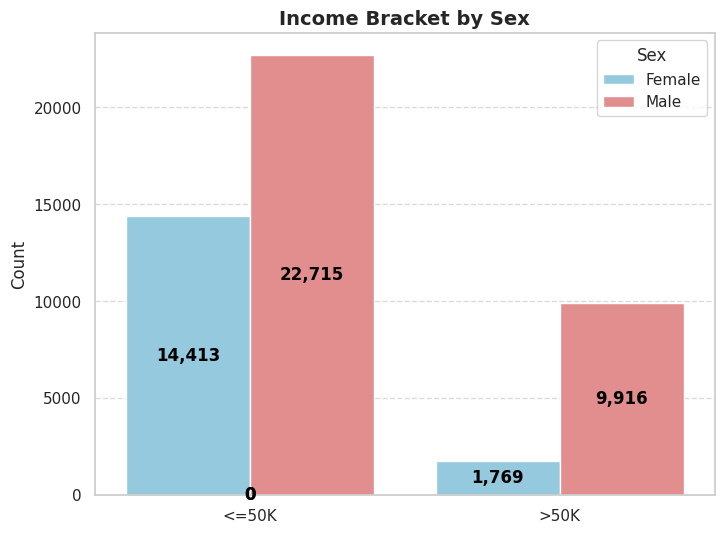

In [149]:
# Count values grouped by sex and income
income_sex_counts = df.groupby(["sex", "income"]).size().reset_index(name="count")

# Create bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=income_sex_counts,
    x="income",
    y="count",
    hue="sex",
    palette=["skyblue", "lightcoral"],  # Custom colors
    dodge=True
)

# Add labels at the center of each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),  # Center of the bar
                ha="center", va="center", fontsize=12, fontweight="bold", color="black")

# Customize the plot
plt.xlabel("")
plt.ylabel("Count", fontsize=12)
plt.title("Income Bracket by Sex", fontsize=14, fontweight="bold")
plt.legend(title="Sex")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



The bar chart illustrates the distribution of income brackets by sex, highlighting disparities in earnings between males and females. In the ≤50K income group, there are 14,413 females and 22,715 males, indicating that a significant portion of both genders falls into the lower-income category. However, the gap widens in the >50K income group, where only 1,769 females earn above 50K, compared to 9,916 males. This suggests that men are more likely to earn higher incomes compared to women, reflecting potential gender-based disparities in earnings.

This visualization suggests gender inequality in income levels, which could be influenced by factors such as job types, work experience, education, or systemic biases in the labor market. The relatively low number of females in the >50K group might indicate barriers to high-paying opportunities, such as the glass ceiling effect or underrepresentation in high-income professions. These insights emphasize the importance of investigating the underlying causes of gender-based income disparities and exploring solutions to promote greater financial equity in the workforce.

### 4.1.3 Income by highest level of education

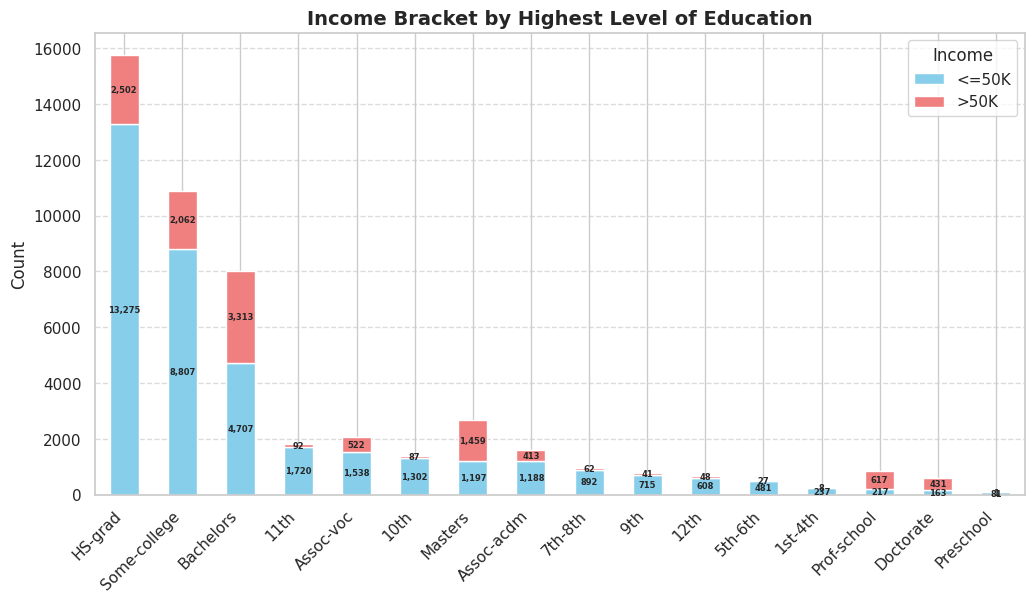

In [150]:
# Count values grouped by education and income
education_income_counts = df.groupby(["education", "income"]).size().unstack()

# Sort education levels based on <=50K counts (to match reference)
education_income_counts = education_income_counts.sort_values(by="<=50K", ascending=False)

# Define colors
colors = ["skyblue", "lightcoral"]  # gray for <=50K, green for >50K

# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 6))
education_income_counts.plot(kind="bar", stacked=True, color=colors, ax=ax)

# Add labels to bars
for index, (low, high) in enumerate(zip(education_income_counts["<=50K"], education_income_counts[">50K"])):
    ax.text(index, low / 2, f"{int(low):,}", ha="center", va="center", fontsize=6, fontweight="bold")
    ax.text(index, low + high / 2, f"{int(high):,}", ha="center", va="center", fontsize=6, fontweight="bold")

# Customize plot
ax.set_xlabel("")
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Income Bracket by Highest Level of Education", fontsize=14, fontweight="bold")
ax.legend(title="Income", labels=["<=50K", ">50K"])
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.xticks(rotation=45, ha="right")
plt.show()

The bar chart illustrates the distribution of income brackets based on the highest level of education attained. The majority of individuals fall into the ≤50K income category, with a notable concentration among those with a high school diploma, some college education, or a bachelor's degree. The high school graduates (13,275) and those with some college education (8,807) have the highest counts in the lower-income group, followed by bachelor’s degree holders (4,707). However, a significant proportion of individuals with bachelor’s, master’s, and doctorate degrees earn more than 50K, highlighting the correlation between higher education and increased earning potential.

Despite this trend, the number of people earning >50K remains relatively low across all education levels. While advanced degrees such as doctorates and professional degrees have a greater share of higher-income earners, many individuals with associate degrees and lower educational qualifications still remain in the lower-income bracket. This suggests that while higher education improves income potential, other factors such as experience, industry, and job opportunities play a crucial role in achieving higher earnings.

### 4.1.4 Income bracket by race

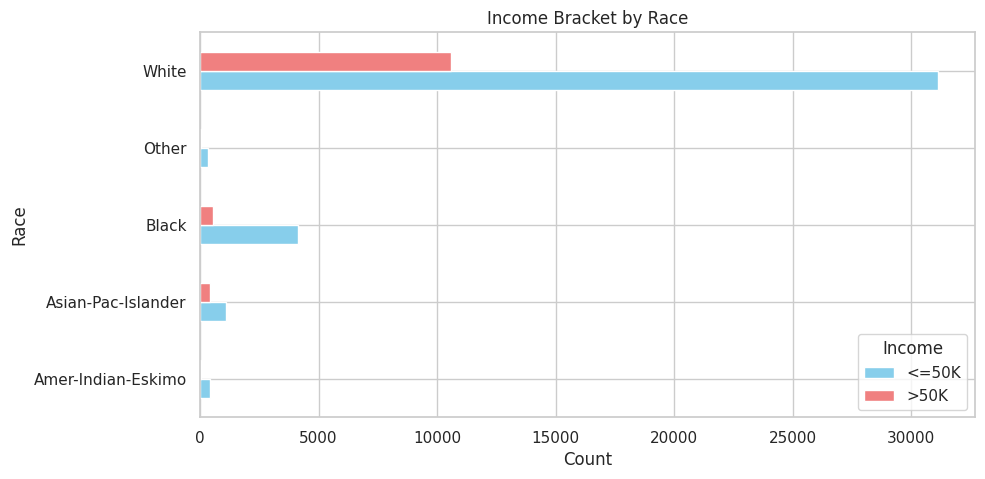

In [151]:
# Count income by race
income_race = df.groupby(["race", "income"]).size().unstack()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
income_race.plot(kind="barh", stacked=False, color=["skyblue", "lightcoral"], ax=ax)

# Labels and title
plt.xlabel("Count")
plt.ylabel("Race")
plt.title("Income Bracket by Race")
plt.legend(title="Income", labels=["<=50K", ">50K"])
plt.xticks(rotation=0)

plt.show()

The bar chart visualizes the distribution of income levels across different racial groups in the Census Income dataset. It is a grouped horizontal bar chart where each race is represented by two bars: one for individuals earning ≤50K (dark blue) and another for those earning >50K (yellow). The length of each bar represents the count of individuals in that income category. This type of visualization helps compare income disparities across racial groups, making it easier to identify trends. From the chart, we can observe that the majority of individuals in the dataset, particularly those identifying as "White," fall into the ≤50K income bracket, while a smaller portion earns more than 50K. Other racial groups also exhibit a similar trend, but with smaller overall counts.

The visualization is created by first grouping the dataset by race and income and then aggregating the count of individuals in each category. The stacked approach allows for a side-by-side comparison, showing how income distribution differs across races. The color scheme helps distinguish the two income brackets clearly. The horizontal layout improves readability, especially when dealing with categorical variables like race. This analysis provides insights into income disparities and can be useful for policymakers or researchers investigating socioeconomic patterns among different demographic groups.

### 4.1.5 Income bracket by Occupation

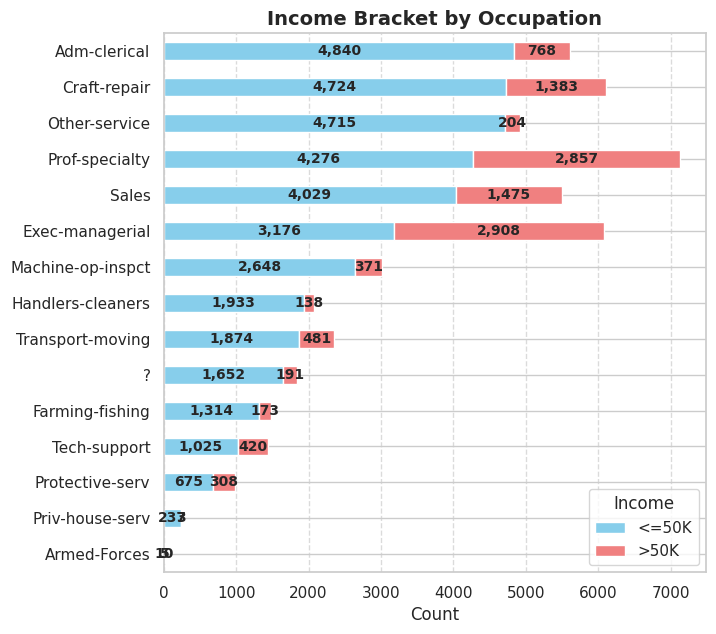

In [152]:
# Count values grouped by occupation and income
occupation_income_counts = df.groupby(["occupation", "income"]).size().unstack()

# Sort by number of people earning <=50K (to match reference)
occupation_income_counts = occupation_income_counts.sort_values(by="<=50K", ascending=True)

# Define colors
colors = ["skyblue", "lightcoral"]  # Dark blue for <=50K, Yellow for >50K

# Create horizontal stacked bar plot
fig, ax = plt.subplots(figsize=(7, 7))
occupation_income_counts.plot(kind="barh", stacked=True, color=colors, ax=ax)

# Add labels to bars
for index, (low, high) in enumerate(zip(occupation_income_counts["<=50K"], occupation_income_counts[">50K"])):
    ax.text(low / 2, index, f"{int(low):,}", ha="center", va="center", fontsize=10, fontweight="bold")
    ax.text(low + high / 2, index, f"{int(high):,}", ha="center", va="center", fontsize=10, fontweight="bold")

# Customize plot
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("")
ax.set_title("Income Bracket by Occupation", fontsize=14, fontweight="bold")
ax.legend(title="Income", labels=["<=50K", ">50K"])
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

The bar chart illustrates the distribution of income brackets across various occupations. The ≤50K income category (blue bars) dominates most occupations, indicating that a significant portion of the workforce earns below this threshold. Administrative, craft-repair, and other service jobs have the highest counts in this lower-income group. Notably, occupations such as professional specialty, executive-managerial, and sales have a more balanced distribution, with a larger proportion of individuals earning >50K (red bars). The executive-managerial role stands out, as nearly half of its workers earn more than 50K, reflecting higher salaries associated with leadership positions.

On the other hand, low-income occupations such as private household service, farming-fishing, and handlers-cleaners have very few individuals earning above 50K, emphasizing the limited earning potential in these fields. Technical and protective service jobs show a small but noticeable presence in the >50K category, suggesting that specialized skills in these sectors can lead to higher earnings. The professional specialty category has one of the highest proportions of >50K earners, reinforcing the idea that advanced expertise and education significantly impact income potential.

<ipython-input-153-aacd2d00e04d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="income", y="hours-per-week", data=df, palette=["skyblue", "lightcoral"], width=0.5)


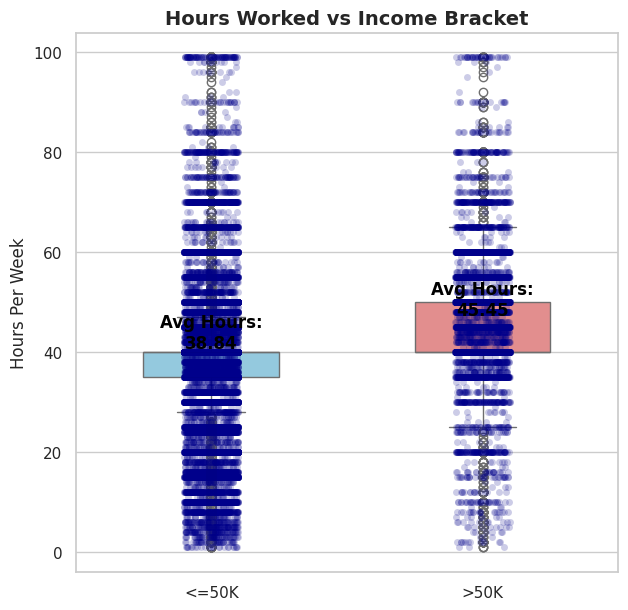

In [153]:
# Set style
sns.set_theme(style="whitegrid")

# Create boxplot
plt.figure(figsize=(7, 7))
ax = sns.boxplot(x="income", y="hours-per-week", data=df, palette=["skyblue", "lightcoral"], width=0.5)

# Add swarmplot for better visualization
sns.stripplot(x="income", y="hours-per-week", data=df, color="darkblue", alpha=0.2, jitter=True)

# Calculate means
means = df.groupby("income")["hours-per-week"].mean()

# Annotate means on the plot
for i, mean in enumerate(means):
    plt.text(i, mean + 2, f"Avg Hours:\n{mean:.2f}", ha="center", fontsize=12, fontweight="bold", color="black")

# Customize plot
plt.xlabel("")
plt.ylabel("Hours Per Week", fontsize=12)
plt.title("Hours Worked vs Income Bracket", fontsize=14, fontweight="bold")

plt.show();

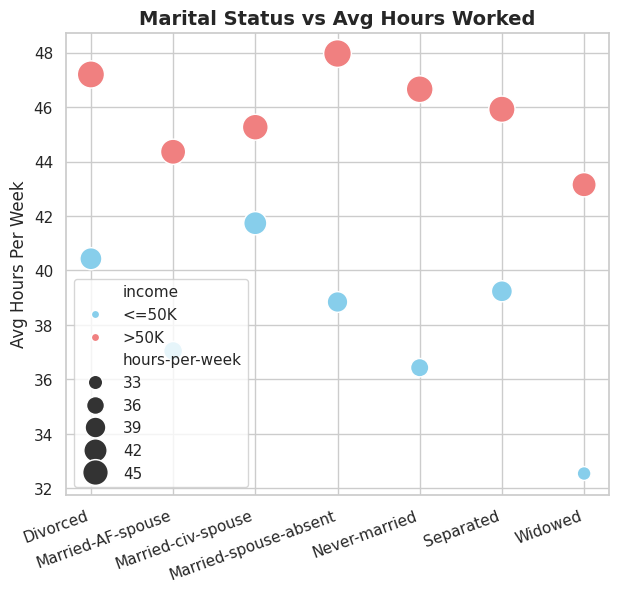

In [154]:
# Group by marital status and income, then calculate mean hours worked
avg_hours = df.groupby(["marital-status", "income"])["hours-per-week"].mean().reset_index()

# Set up the plot
plt.figure(figsize=(7, 6))
sns.set_theme(style="whitegrid")

# Scatter plot
ax = sns.scatterplot(
    x="marital-status",
    y="hours-per-week",
    hue="income",
    size="hours-per-week",
    sizes=(100, 400),
    palette={"<=50K": "skyblue", ">50K": "lightcoral"},
    data=avg_hours
)

# Customize
plt.xticks(rotation=20, ha="right")
plt.xlabel("")
plt.ylabel("Avg Hours Per Week", fontsize=12)
plt.title("Marital Status vs Avg Hours Worked", fontsize=14, fontweight="bold")

plt.show()

### 4.1.6 Pie Chart: Distribution of workclass

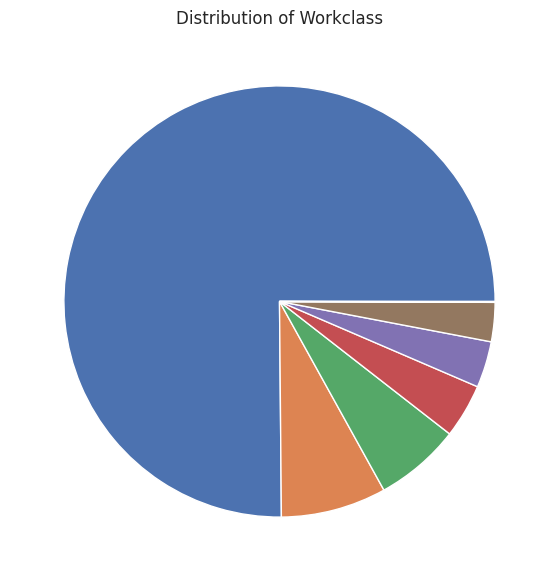

In [155]:
plt.figure(figsize=(7, 7))
x = df['workclass'].value_counts()
plt.pie(x)
plt.title('Distribution of Workclass')
plt.ylabel('')
plt.show()

The workclass distribution reveals key socioeconomic and data science insights. The dominance of the private sector (75.2%) suggests a strong reliance on wage-based employment, which may limit economic mobility compared to entrepreneurship. The self-employed category (12%) shows a disparity, where incorporated businesses (4.1%) likely earn more than unincorporated ones (7.9%), which may include gig workers and small business owners with volatile income. Government jobs, at just 12.8%, indicate either barriers to entry or a preference for private-sector growth despite their stability and benefits. The near-zero presence of "Without Pay" and "Never Worked" likely masks an invisible labor force, including unpaid caregivers and informal workers. From a data science perspective, the overrepresentation of private-sector workers and underrepresentation of self-employed and government employees may introduce bias in income prediction models, potentially underestimating non-traditional workers' earnings. These insights highlight deeper structural patterns in the workforce, which are crucial for both policy-making and AI-driven financial modeling.

<font color='red'>**Comments:**

<font color='red'>**- What did you observe from the pie chart above?**

<font color='red'>**- What insights can you share with your readers based on the pie chart?**

The bar plot displays the count of individuals by their education level and their income category (\<= \$50K and \> \$50K). It illustrates which educational backgrounds are more prevalent in each income category.

<font color='red'>**Comments:**

<font color='red'>**- What did you observe from the count plot above?**

<font color='red'>**- What insights can you share with your readers based on the count plot?**

<font color='red'>**- Share some insights that only you, as the subject matter expert, can derive from this analysis, don't you think?**

### 4.1.7 Box Plot: Age Distribution by Income

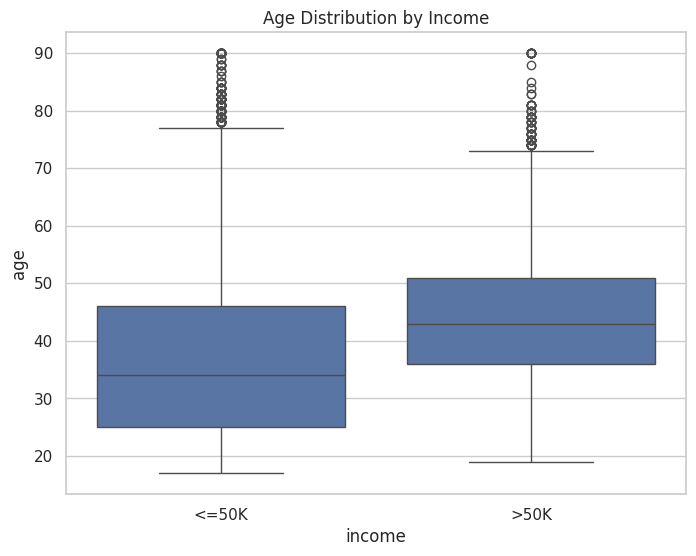

In [156]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='income', y='age')
plt.title('Age Distribution by Income')
plt.show()

The box plot shows the distribution of ages for individuals in each income category. This helps in understanding the age range and medians for both income groups.

<font color='red'>**Comments:**

<font color='red'>**- What did you observe from the box plot above?**

<font color='red'>**- What insights can you share with your readers based on the box plot?**

<font color='red'>**- Share some insights that only you, as the subject matter expert, can derive from this analysis, don't you think?**

### 4.1.8 Count Plot: Marital Status Count

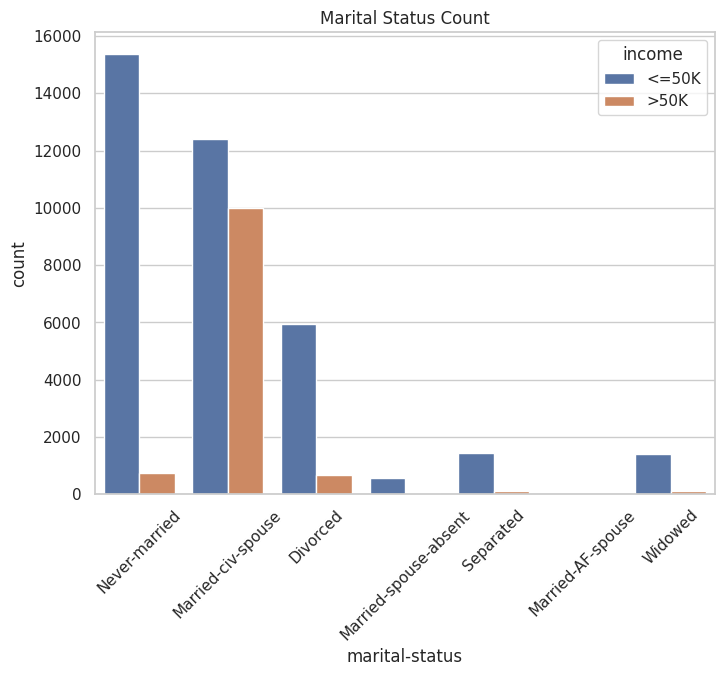

In [157]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='marital-status', hue = 'income')
plt.title('Marital Status Count')
plt.xticks(rotation=45)
plt.show()

The count plot shows the frequency of different marital statuses in the dataset. It's useful for visualizing the most common marital statuses among individuals.

<font color='red'>**Comments:**

<font color='red'>**- What did you observe from the count plot above?**

<font color='red'>**- What insights can you share with your readers based on the count plot?**

<font color='red'>**- Share some insights that only you, as the subject matter expert, can derive from this analysis, don't you think?**

### 4.1.9 Histogram: Hours per Week Distribution

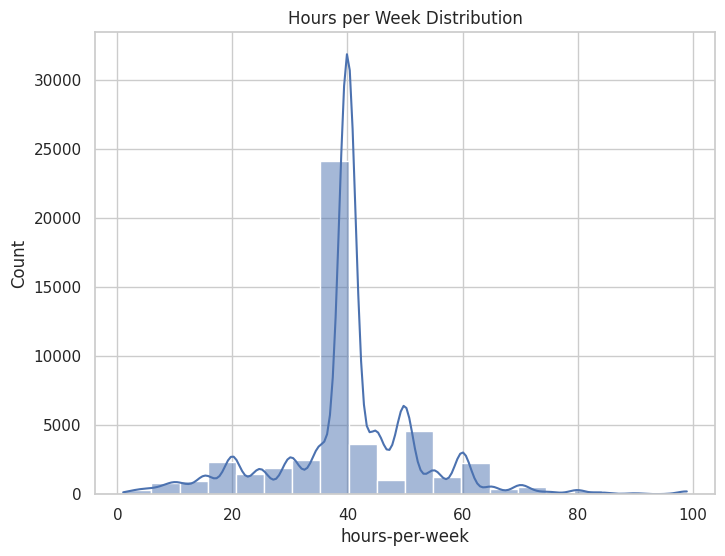

In [158]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='hours-per-week', bins=20, kde=True)
plt.title('Hours per Week Distribution')
plt.show()

This histogram displays the distribution of hours per week worked by the individuals. The kernel density estimate (KDE) line provides a smoothed distribution curve.

<font color='red'>**Comments:**

<font color='red'>**- What did you observe from the histogram above?**

<font color='red'>**- What insights can you share with your readers based on the histogram?**

<font color='red'>**- Share some insights that only you, as the subject matter expert, can derive from this analysis, don't you think?**

# 6. Result and Discussion

The UCI Adult dataset, a foundational resource in machine learning, predicts income levels exceeding $50,000 annually based on demographic and employment data. A recent analysis by Ding, Hardt, Miller, and Schmidt at NeurIPS 2021 highlighted limitations in the dataset, particularly the potential skewing effect of the binary income threshold on fairness analyses for specific demographic groups. Their study underscores the significant impact of income thresholds on fairness criteria violations, urging a reconsideration for a more comprehensive portrayal of income distributions. It is this background context through which we tried to answer multiple questions about our data. As discussed in the results section, we found several factors that seemed to impact income bracket distribution, such as age, gender, education level, occupation, number of hours worked, and marital status. While no definitive conclusions can be made, especially given the age and context surrounding the dataset, we still find that these visualizations provide meaningful and exciting discoveries.

Looking ahead, future studies could delve deeper into the nuanced interplay between demographic factors and income bracket distributions. Exploring these factors in conjunction with other societal dynamics may unravel deeper insights into income disparities and their relationship with socio-economic variables. Additionally, considering the evolving societal landscape, investigating temporal shifts in these relationships across different eras or within diverse cultural contexts could provide a more comprehensive understanding. Furthermore, employing advanced analytical methodologies and machine learning models may offer enhanced predictive capabilities while addressing fairness concerns associated with income threshold categorizations.

# 7. Conclusion

The majority of individuals are employed in the private sector (\~70.5%), with self-employed and government workers comprising the rest of the distribution. This underscores the significant role of private sector employment in the dataset.

Higher education levels, such as Bachelor's and Master's degrees, are associated with higher income levels. Individuals with higher education often have better job opportunities, leading to increased earning potential. This aligns with broader trends observed in labor statistics.

Older individuals tend to earn more, with the median age higher for those earning more than \$50K. This finding suggests that income often increases with age due to accumulated experience and career progression.

The most common marital statuses are "Married-civ-spouse" and "Never-married." Marital status can influence household income dynamics, especially for married individuals who might have dual-income households.

Most individuals work around 40 hours per week, with a significant peak around this mark. Full-time employment is standard, but some individuals work significantly more or less, impacting their income.

<font color='red'>**Comments:**

<font color='red'>**- Do the claims you make in the conclusion address your problem statement?**

<font color='red'>**- Could you provide insights on whether similar observations have been reported by others?**

<font color='red'>**- Doing so will make your conclusion stronger and more impactful.**



<font color='red'>**Overall comments:**

<font color='red'>**- Most of your code snippets, you don't add comments with hashtags (#)**

<font color='red'>**- Adding hashtags (#) is a good practice for easy documentation**
